In [3]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
Y = np.array([1, 3, 2.5])
X = np.array([[-1.5], [0.5], [0.7]])

def k(x1, x2, width=1):
    return 0.5 * np.exp(-(x1-x2.T)**2/(2*width))

k(X,X)

array([[0.5       , 0.06766764, 0.04446081],
       [0.06766764, 0.5       , 0.49009934],
       [0.04446081, 0.49009934, 0.5       ]])

In [13]:
def prediction(X, Y, x_star, width=1):
    K = k(X, X, width=width)
    k_star = k(X, x_star, width=width)
    k_starstar = k(x_star, x_star, width=width)
    K = np.linalg.inv(K)
    mu_star = k_star.T.dot(K).dot(Y)
    sigma_star = k_starstar - k_star.T.dot(K).dot(k_star)
    return mu_star, sigma_star

Text(0, 0.5, 'y (target)')

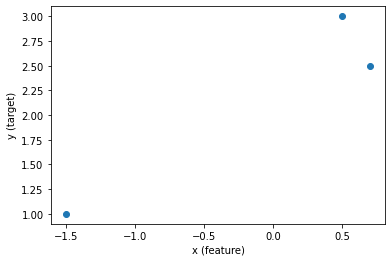

In [14]:
plt.scatter(X, Y)
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

In [15]:
prediction(X, Y, np.array([[0]]))

(array([3.58493669]), array([[0.0172987]]))

In [16]:
prediction(X, Y, np.array([[3]]))

(array([-0.17934726]), array([[0.48873954]]))

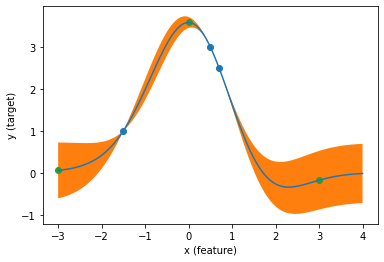

In [43]:
x_range = np.linspace(-3, 4, 100)
mean, var = prediction(X, Y, x_range)

fig, ax = plt.subplots()
plt.scatter(X, Y)
ax.fill_between(x_range, mean - np.diag(np.sqrt(var)).ravel(), mean + np.diag(np.sqrt(var)).ravel())
plt.plot(x_range, mean)
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

plt.scatter([-3, 0, 3], prediction(X, Y, np.array([[-3], [0], [3]]))[0])

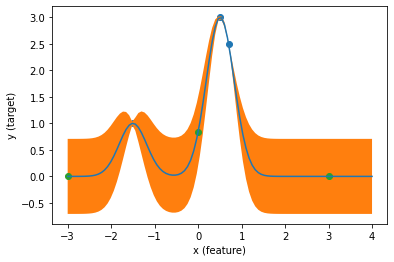

In [47]:
x_range = np.linspace(-3, 4, 100)
mean, var = prediction(X, Y, x_range, width=0.1)

fig, ax = plt.subplots()
plt.scatter(X, Y)
ax.fill_between(x_range, mean - np.diag(np.sqrt(var)).ravel(), mean + np.diag(np.sqrt(var)).ravel())
plt.plot(x_range, mean)
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

mean_pred = prediction(X, Y, np.array([[-3], [0], [3]]), width=0.1)[0]
plt.scatter([-3, 0, 3], mean_pred)

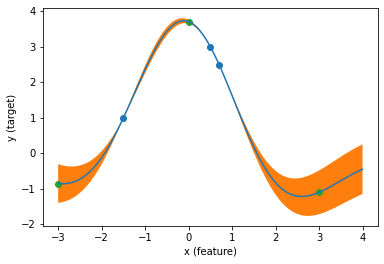

In [50]:
x_range = np.linspace(-3, 4, 100)
mean, var = prediction(X, Y, x_range, width=2)

fig, ax = plt.subplots()
plt.scatter(X, Y)
ax.fill_between(x_range, mean - np.diag(np.sqrt(var)).ravel(), mean + np.diag(np.sqrt(var)).ravel())
plt.plot(x_range, mean)
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

mean_pred = prediction(X, Y, np.array([[-3], [0], [3]]), width=2)[0]
plt.scatter([-3, 0, 3], mean_pred)